# Fast Fourier Transform - Example

The below example showcases a basic application of the Fast Fourier Transform onto three signals:

1. [Sinc](https://en.wikipedia.org/wiki/Sinc_function)

$$f(x) = \begin{dcases}
            \frac{sin(x)}{x}, \ x \neq 0 \\
            1, \ x = 0
         \end{dcases}$$

2. Square

$$
    f(x) = \begin{dcases}
        1, \ -a \leq x \leq a \\
        0, \ x \geq a, x \leq -a
    \end{dcases}
$$

3. [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution)

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
sinc_f = lambda x : np.sin(x)/x

def sinc_f(x):
    if type(x) == np.ndarray:
        f = np.sin(x)/x
        f[np.isnan(f)] = 1.0
        return f.astype(np.float32)
    elif x == 0.0:
        return 1.0
    else:
        return np.sin(x)/x

gaussian = lambda x, a, sigma : (1/sigma*np.sqrt(2*np.pi))*np.exp(0.5*(-(x-a)**2/sigma**2))

def square_f(x, e_square):
    square = np.ones_like(x, dtype = np.float32)
    square[x < -e_square] = 0.0
    square[x > e_square] = 0.0
    return square

In [22]:
e_x = 100.0
e_square = 5.0
dt = 0.001
x = np.arange(-e_x, e_x, dt)

sinc = sinc_f(x)

gauss = gaussian(x, 0.0, 10.0).astype(np.float32)

square = square_f(x, e_square)

print(sinc_f(0.000001))

w = 100.0
sin = np.sin(w*x)

0.9999999999998334


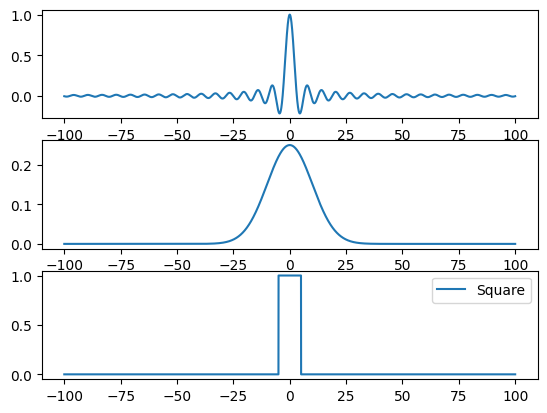

In [23]:
plt.subplot(311)
plt.plot(x, sinc, label = "Sinc")
plt.subplot(312)
plt.plot(x, gauss, label = "Gaussian")
plt.subplot(313)
plt.plot(x, square, label = "Square")
plt.legend()

The output of *np.fft.fftfreq* of *numpy* is in $\frac{cycles}{s}$. As a reminder:

$[f] = \frac{cycle}{s}$

$[w] = \frac{rad}{s}$

The relation between $f$ and $w$ is:

$w = 2\pi f$

100000


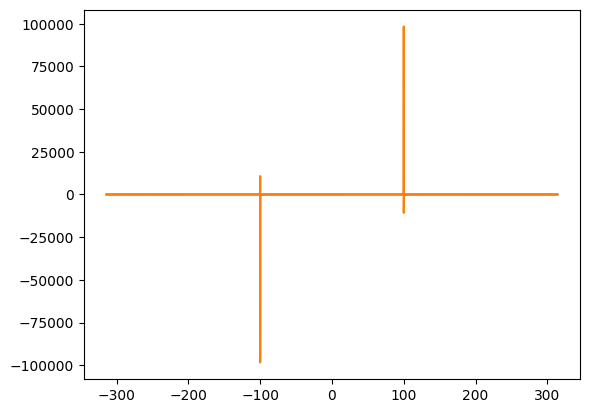

In [31]:
from scipy.fft import fft, ifft, fftfreq, fftshift


F_sin = fftshift(fft(sin, sin.shape[0]))
F_sin_freqs = fftshift(2*np.pi*fftfreq(sin.size, d = dt))

center = x.size//2
print(center)
b = 10000

plt.plot(F_sin_freqs[center - b:center + b], F_sin.real[center - b:center + b])
plt.plot(F_sin_freqs[center - b:center + b], F_sin.imag[center - b:center + b])

In [25]:
F_sinc = fft(sinc, sinc.shape[0])
F_sinc_freqs = 2*np.pi*fftfreq(sinc.size, d = dt)

F_square = fft(square, square.shape[0])
F_square_freqs = 2*np.pi*fftfreq(square.size, d = dt)

F_gauss = fft(gauss, gauss.shape[0])
F_gauss_freqs = 2*np.pi*fftfreq(gauss.size, d = dt)


100000


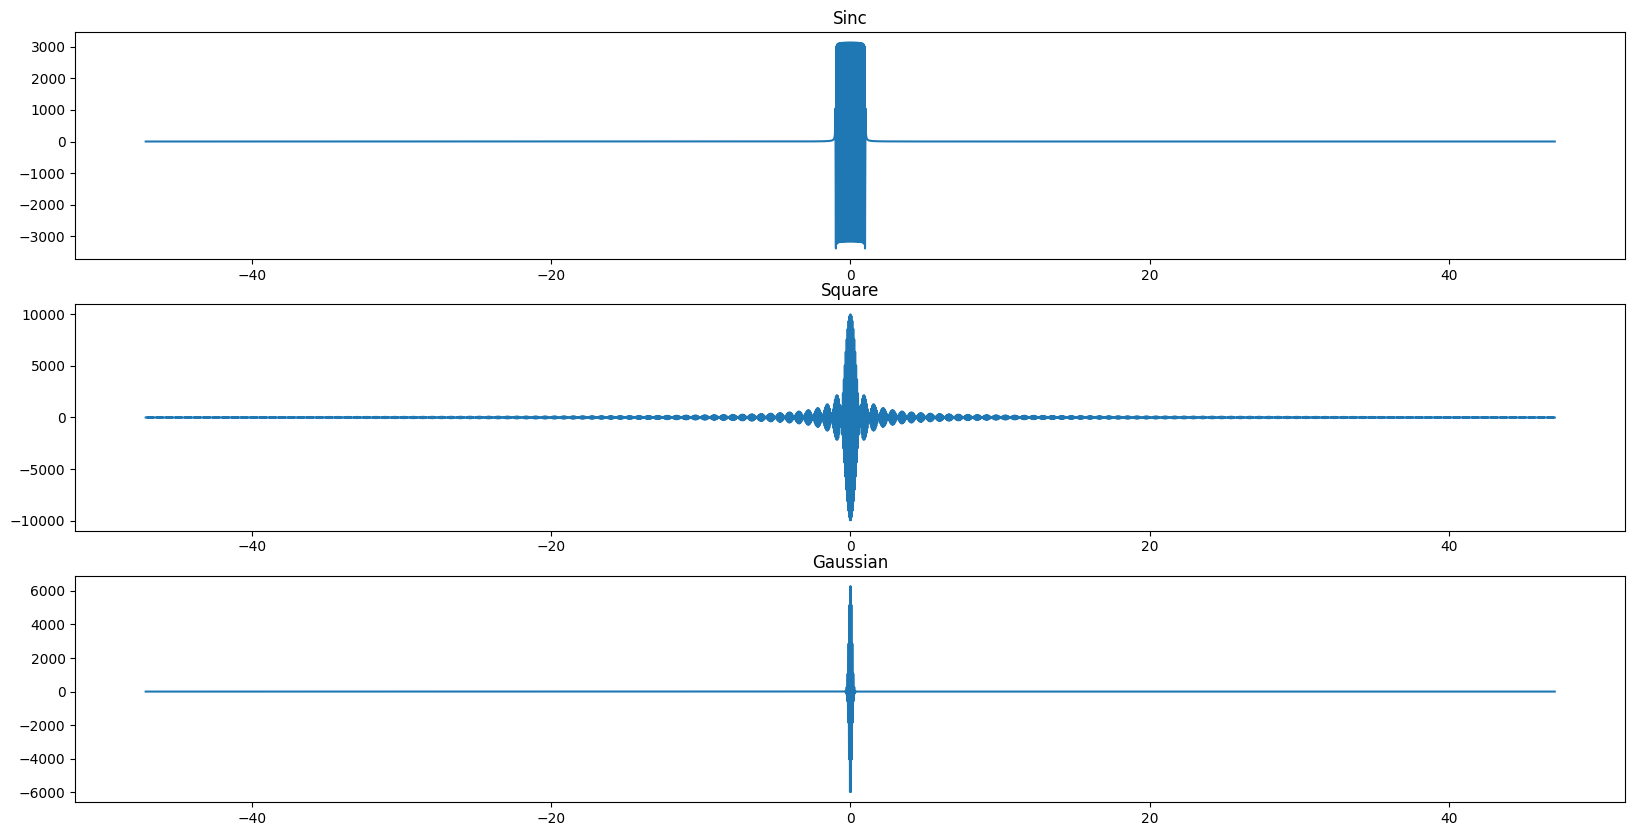

In [26]:
F_sinc = fftshift(F_sinc)
F_sinc_freqs = fftshift(F_sinc_freqs)

F_square = fftshift(F_square)
F_square_freqs = fftshift(F_square_freqs)

F_gauss = fftshift(F_gauss)
F_gauss_freqs = fftshift(F_gauss_freqs)

inv = ifft(F_gauss, F_gauss.shape[0])

center = x.size//2
print(center)
# b = x.size//2
b = 1500

plt.figure(figsize = (20, 10))
plt.subplot(311)
plt.plot(F_sinc_freqs[center - b:center + b], F_sinc.real[center - b:center + b])
plt.title("Sinc")
plt.subplot(312)
plt.plot(F_square_freqs[center - b:center + b], F_square.real[center - b:center + b])
plt.title("Square")
plt.subplot(313)
plt.plot(F_gauss_freqs[center - b:center + b], F_gauss.real[center - b:center + b])
plt.title("Gaussian")
plt.show()

Something is worth noting: The actual fourier transform of the three functions are:

1. **Sinc** $\rightarrow$ Square
2. **Square** $\rightarrow$ Sinc
3. **Gaussian** $\rightarrow$ Gaussian

However, it can be seen above that the *FFT* of those three actually outputs a different FT format, that after a closer look, it is revealed to be the above expected functions *enveloping* a sinusoidal or some oscillatory function. My guess is that as we are dealing with a limited time window, those weird spectra are actually a "mistake" of the method when taking those into account, the so called "[Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon)". For more reference to that, some links:

[https://dsp.stackexchange.com/questions/10120/why-does-spectral-leakage-arise-in-an-fft](https://dsp.stackexchange.com/questions/10120/why-does-spectral-leakage-arise-in-an-fft)

[https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/leak.html](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/leak.html)

If we apply an inverse fourier transform onto the processed signal, we will retrieve the original function, so it must be working:

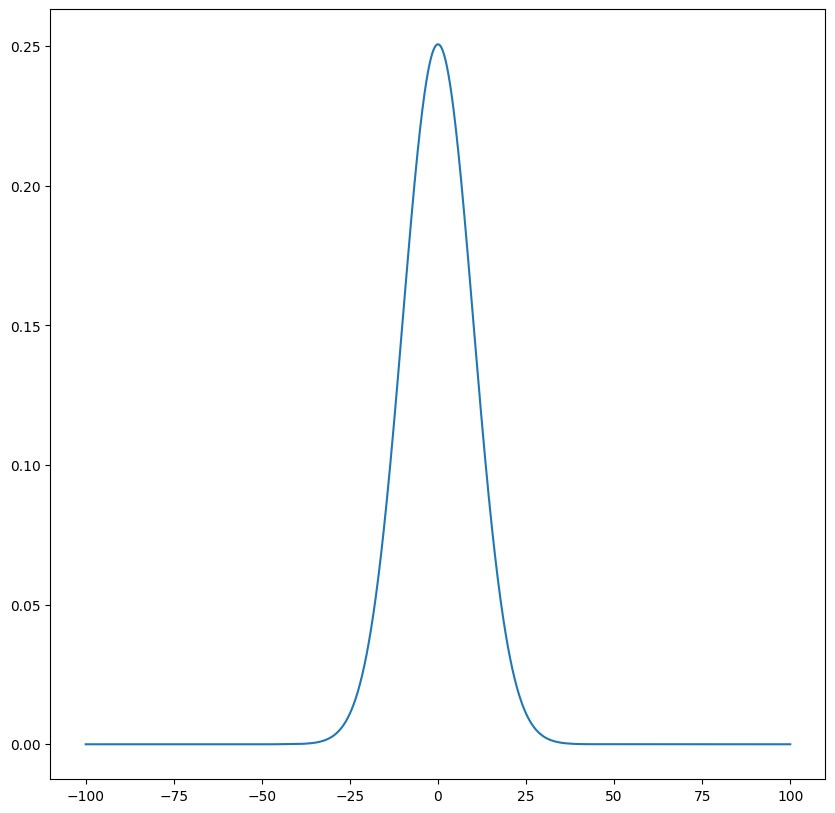

In [27]:
F_sinc = fftshift(F_sinc)
F_sinc_freqs = fftshift(F_sinc_freqs)

F_square = fftshift(F_square)
F_square_freqs = fftshift(F_square_freqs)

F_gauss = fftshift(F_gauss)
F_gauss_freqs = fftshift(F_gauss_freqs)

inv = ifft(F_gauss, F_gauss.shape[0])

plt.figure(figsize = (10, 10))
plt.plot(x, inv.real)